In [2]:
import pandas as pd
# 导入tushare
import tushare as ts
# 初始化pro接口
pro = ts.pro_api('25a96ba19405e56481ef7c3b9bf3f9dd25a490c54ee03f761857ec30')

# 拉取数据
df = pro.daily(**{
    "ts_code": "601857.SH",
    "trade_date": "",
    "start_date": "",
    "end_date": "",
    "offset": "",
    "limit": ""
}, fields=[
    "ts_code",
    "trade_date",
    "open",
    "high",
    "low",
    "close",
    "pre_close",
    "change",
    "pct_chg",
    "vol",
    "amount"
])
#时间序列化
df['trade_date'] = pd.to_datetime(df['trade_date'])
#将日期设置为索引
df.set_index('trade_date', inplace=True)
df


,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2023-09-22,601857.SH,8.02,8.12,7.97,8.11,7.99,0.12,1.5019,1111403.49,8.962363e+05
2023-09-21,601857.SH,8.12,8.18,7.99,7.99,8.12,-0.13,-1.6010,1063015.36,8.551164e+05
2023-09-20,601857.SH,8.14,8.20,8.08,8.12,8.11,0.01,0.1233,1267611.83,1.030121e+06
2023-09-19,601857.SH,8.22,8.34,8.20,8.32,8.23,0.09,1.0936,1178341.15,9.788768e+05
2023-09-18,601857.SH,8.29,8.33,8.12,8.23,8.29,-0.06,-0.7238,1669064.16,1.365624e+06
...,...,...,...,...,...,...,...,...,...,...
2007-11-09,601857.SH,37.85,38.39,36.66,38.18,38.19,-0.01,-0.0300,1432266.03,5.379485e+06
2007-11-08,601857.SH,39.20,39.75,38.00,38.19,40.43,-2.24,-5.5400,1400509.61,5.447045e+06
2007-11-07,601857.SH,39.70,40.73,38.28,40.43,39.99,0.44,1.1000,2166188.70,8.575267e+06


In [3]:
import pandas as pd
import os
import os,glob
file_dir="D:/Thesis/USD_CNY.csv"
xe_data=pd.read_csv(file_dir,low_memory=False,encoding='gb18030')
xe_df=pd.DataFrame(xe_data)
#时间序列化
xe_df['xe_date'] = pd.to_datetime(xe_df['xe_date'])
#将日期设置为索引列
xe_df.set_index('xe_date',inplace=True)
#如果数据不安时间顺序排列则xe_df.sort_index(inplace=True)
#删除重复内容
xe_df = xe_df.drop_duplicates()
# 获取最早的日期
start_date = max(df.index.min(), xe_df.index.min())

# 获取最晚的日期
end_date = min(df.index.max(), xe_df.index.max())
# 在df中剔除不在日期范围内的数据
df = df[(df.index >= start_date) & (df.index <= end_date)]
# 在xe_df中剔除不在日期范围内的数据
xe_df = xe_df[(xe_df.index >= start_date) & (xe_df.index <= end_date)]

#删除目录下的老文件
#os.remove(file_dir)
#将数据存入新的csv文件中
#xe_df.to_csv(file_dir,index=False)
xe_df

,close,open,max,min,trade_vol,rise_fall
xe_date,,,,,,
2023-09-15,7.2744,7.2804,7.2821,7.2471,NaN,-0.04%
2023-09-14,7.2770,7.2732,7.2804,7.2703,NaN,0.10%
2023-09-13,7.2700,7.2842,7.2906,7.2692,NaN,-0.29%
2023-09-12,7.2910,7.2872,7.2959,7.2818,NaN,0.04%
2023-09-11,7.2882,7.3236,7.3254,7.2709,NaN,-0.75%
...,...,...,...,...,...,...
2007-11-09,7.4115,7.4220,7.4220,7.4110,NaN,-0.12%
2007-11-08,7.4207,7.4358,7.4358,7.4203,NaN,-0.29%
2007-11-07,7.4425,7.4535,7.4545,7.4410,NaN,-0.15%


In [4]:
import pandas as pd

#创建一个新的DataFrame，以日期为索引
merged_df = pd.DataFrame(index=df.index)

# 将股票价格数据添加到新的DataFrame
merged_df['Stock_Price'] = df['close']

# 将汇率数据添加到新的DataFrame
merged_df['Exchange_Rate'] = xe_df['close']

# 删除同时缺失股票价格和汇率数据的行，保留只要其中一个有数据的行
merged_df.dropna(subset=['Stock_Price', 'Exchange_Rate'], how='any', inplace=True)

merged_df

,Stock_Price,Exchange_Rate
trade_date,,
2023-09-15,8.29,7.2744
2023-09-14,8.34,7.2770
2023-09-13,8.27,7.2700
2023-09-12,8.10,7.2910
2023-09-11,8.13,7.2882
...,...,...
2007-11-09,38.18,7.4115
2007-11-08,38.19,7.4207
2007-11-07,40.43,7.4425


Pandas computed Pearson r: 0.22987572229204015
Scipy computed Pearson r: 0.22987572229205855 and p-value: 2.280990677509493e-47


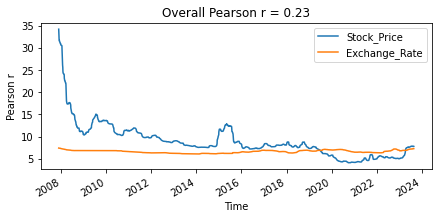

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

overall_pearson_r = merged_df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(merged_df.dropna()['Stock_Price'], merged_df.dropna()['Exchange_Rate'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 计算滑动窗口同步性
f,ax=plt.subplots(figsize=(7,3))
merged_df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

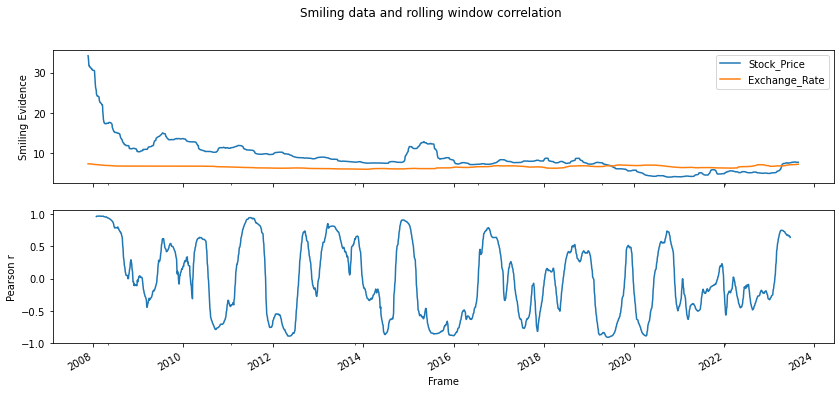

In [9]:
# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 120
# 插入缺失值
df_interpolated = merged_df.interpolate()
# 计算滑动窗口同步性
rolling_r = df_interpolated['Stock_Price'].rolling(window=r_window_size, center=True).corr(df_interpolated['Exchange_Rate'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
merged_df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")


C:\Users\Karl\AppData\Local\Temp\ipykernel_16356\4200637828.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])


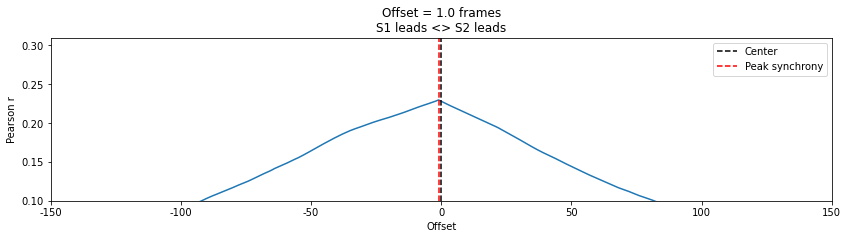

In [10]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = merged_df['Stock_Price']
d2 = merged_df['Exchange_Rate']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
plt.legend()
plt.show()

In [14]:
seconds = 5
fps = 30
no_splits = 20
samples_per_split = merged_df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = merged_df['Stock_Price'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = merged_df['Exchange_Rate'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# 滑动窗口时间滞后互相关
seconds = 5
fps = 30
window_size = 300 #样本
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = merged_df['Stock_Price'].iloc[t_start:t_end]
    d2 = merged_df['Exchange_Rate'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
plt.show()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [0.0] of type float

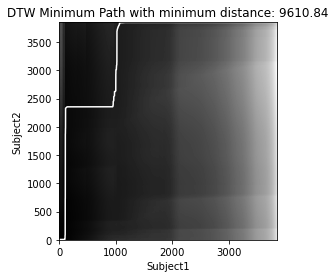

In [17]:
from dtw import dtw,accelerated_dtw

d1 = merged_df['Stock_Price'].interpolate().values
d2 = merged_df['Exchange_Rate'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()